In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df_gm = pd.read_csv('GM_21000_limpio.csv')
df_gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21587 entries, 0 to 21586
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    21587 non-null  int64  
 1   player        21587 non-null  object 
 2   color         21587 non-null  object 
 3   opponent      21587 non-null  object 
 4   player_Elo    20555 non-null  float64
 5   opponent_Elo  21266 non-null  float64
 6   result        21587 non-null  object 
 7   event         20811 non-null  object 
 8   site          21556 non-null  object 
 9   date          21587 non-null  object 
 10  moves         21392 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 1.8+ MB


quiero agregar una columna numerica de si el jugador de la fila gano o perdio la partida

In [3]:
def resultado_a_numerico(valor):
    if valor == 'Win':
        numerico = 2
    if valor == 'Lose':
        numerico = 0
    if valor == 'Draw':
        numerico = 1
    return numerico

In [4]:
# quiero estudiar una correlacion entre el resultado y el elo del oponente o la q de movimientos en la partida, para ello genero una columna numerica acorde al resultado de la partida
# utilizando la formula de la celda anterior (win = 2, draw = 1, lose = 0)
df_gm['resultado_num'] = df_gm['result'].transform(resultado_a_numerico)
# mas adelante hago las correlaciones y no me dicen nada, voy a dejar la columna pero es irrelevante

In [5]:
df_gm['date'] = pd.to_datetime(df_gm['date'])
df_gm.head()

,Unnamed: 0,player,color,opponent,player_Elo,opponent_Elo,result,event,site,date,moves,resultado_num
0,0,Tal,Black,Feibert Fred (GER),NaN,2285.0,Win,It (open),Leningrad (Russia),1991-01-01,63.0,2
1,1,Tal,Black,Westerinen Heikki M J (FIN),NaN,2410.0,Win,It,Moscow (Russia),1982-01-01,74.0,2
2,2,Tal,Black,Larsen Bent (DEN),NaN,2565.0,Win,It (cat.14),Bugojno (Bosnia & Herzegovina),1984-01-01,56.0,2
3,3,Tal,White,Azmaiparashvili Zurab (GEO),NaN,2470.0,Draw,Memorial V.Goglidze,Tbilisi (Georgia),1986-01-01,31.0,1
4,4,Tal,White,Wedberg Tom (SWE),NaN,2480.0,Win,It (open),New York (USA),1990-01-01,69.0,2


<Axes: xlabel='date', ylabel='Count'>

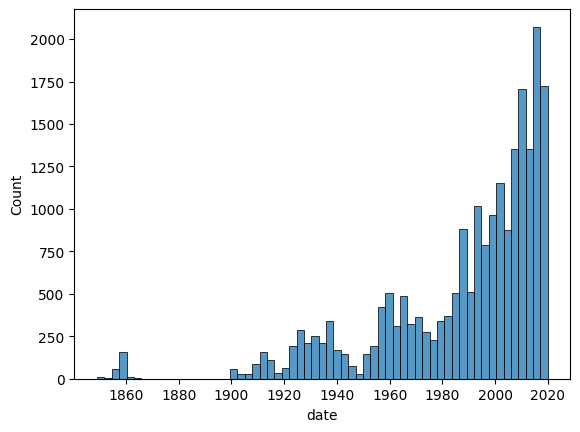

In [6]:
sns.histplot(df_gm, x= 'date')
# tengo muchos mas datos de 2000 en adelante aprox

quiero estudiar por periodos de tiempo, principalmente q de movimientos por partida


In [7]:
año_1880 = pd.to_datetime('1880-01-01') # genero valores datetime para segmentar el df original en df periodicos
año_1920 = pd.to_datetime('1920-01-01')
año_1960 = pd.to_datetime('1960-01-01')
año_2000 = pd.to_datetime('2000-01-01')

df_1880_atras = df_gm[df_gm['date'] < año_1880]
df_1920_atras = df_gm[(df_gm['date'] > año_1880) & (df_gm['date'] < año_1920)]
df_1960_atras = df_gm[(df_gm['date'] > año_1920) & (df_gm['date'] < año_1960)]
df_2000_atras = df_gm[(df_gm['date'] > año_1960) & (df_gm['date'] < año_2000)]
df_2020_atras = df_gm[df_gm['date'] > año_2000]

In [8]:
df_2020_atras['moves'].fillna(df_2020_atras['moves'].mean(), inplace= True)
df_2020_atras.info()
# en la siguiente celda me daba problemas para generar el boxplot porque habia nulos en la columna de moves. relleno con medias

<class 'pandas.core.frame.DataFrame'>
Index: 10235 entries, 2672 to 20312
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     10235 non-null  int64         
 1   player         10235 non-null  object        
 2   color          10235 non-null  object        
 3   opponent       10235 non-null  object        
 4   player_Elo     10047 non-null  float64       
 5   opponent_Elo   9990 non-null   float64       
 6   result         10235 non-null  object        
 7   event          10235 non-null  object        
 8   site           10235 non-null  object        
 9   date           10235 non-null  datetime64[ns]
 10  moves          10235 non-null  float64       
 11  resultado_num  10235 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 1.0+ MB


C:\Users\franc\AppData\Local\Temp\ipykernel_11840\3176434799.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2020_atras['moves'].fillna(df_2020_atras['moves'].mean(), inplace= True)
C:\Users\franc\AppData\Local\Temp\ipykernel_11840\3176434799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_atras['moves'].fillna(df_2020_atras

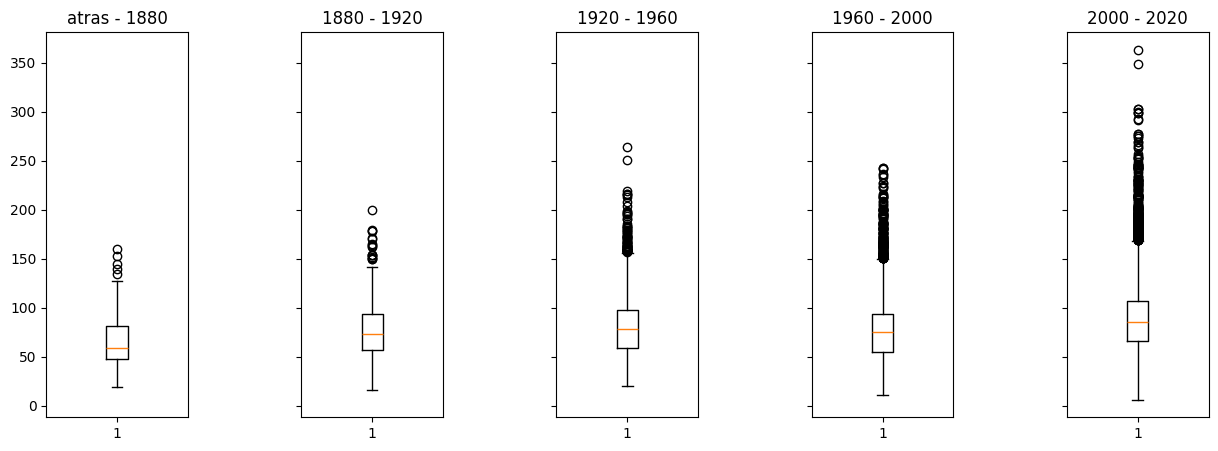

In [9]:
periodos = [df_1880_atras, df_1920_atras, df_1960_atras, df_2000_atras, df_2020_atras]
titulos = ['atras - 1880', '1880 - 1920', '1920 - 1960', '1960 - 2000', '2000 - 2020']
fig, ax = plt.subplots(1, 5, figsize= (15, 5), sharex= 'col', sharey= 'row')
fig.subplots_adjust(hspace= 0.4, wspace= 0.8)
for index, per in enumerate(periodos):
    ax[index].boxplot(per.moves)
    ax[index].set_title(f"{titulos[index]}")


In [10]:
medias_periodos = []
for index, per in enumerate(periodos):
    media = round(per.moves.mean(), 0)
    medias_periodos.append(media)
    print(f'periodo {index + 1}', media)

    # en los boxplots no se nota tanto, pero ahora mirando los numeros si veo una subida curiosa de los moves por partida, aunque tampoco es algo que me vuele la cabeza
    # supongo que a dia de hoy todo esta estudiado y ante un escenario el jugador altual sabe como responder acorde a estudio de escenarios similares o iguales anteriores, y el adversario igual, y asi se alarga la partida hasta
    # llegar a un escenario desconocido donde ya se decide

    # si encuentro un data de evolucion de bases de datos de partidas de ajedrez en el tiempo y la correlaciono con la q de movimientos igual podria probar la hipotesis?
    # ahora no dispongo de esa data, si la encuentro lo miro

    # nota: no lo encontre


periodo 1 66.0
periodo 2 77.0
periodo 3 81.0
periodo 4 77.0
periodo 5 90.0


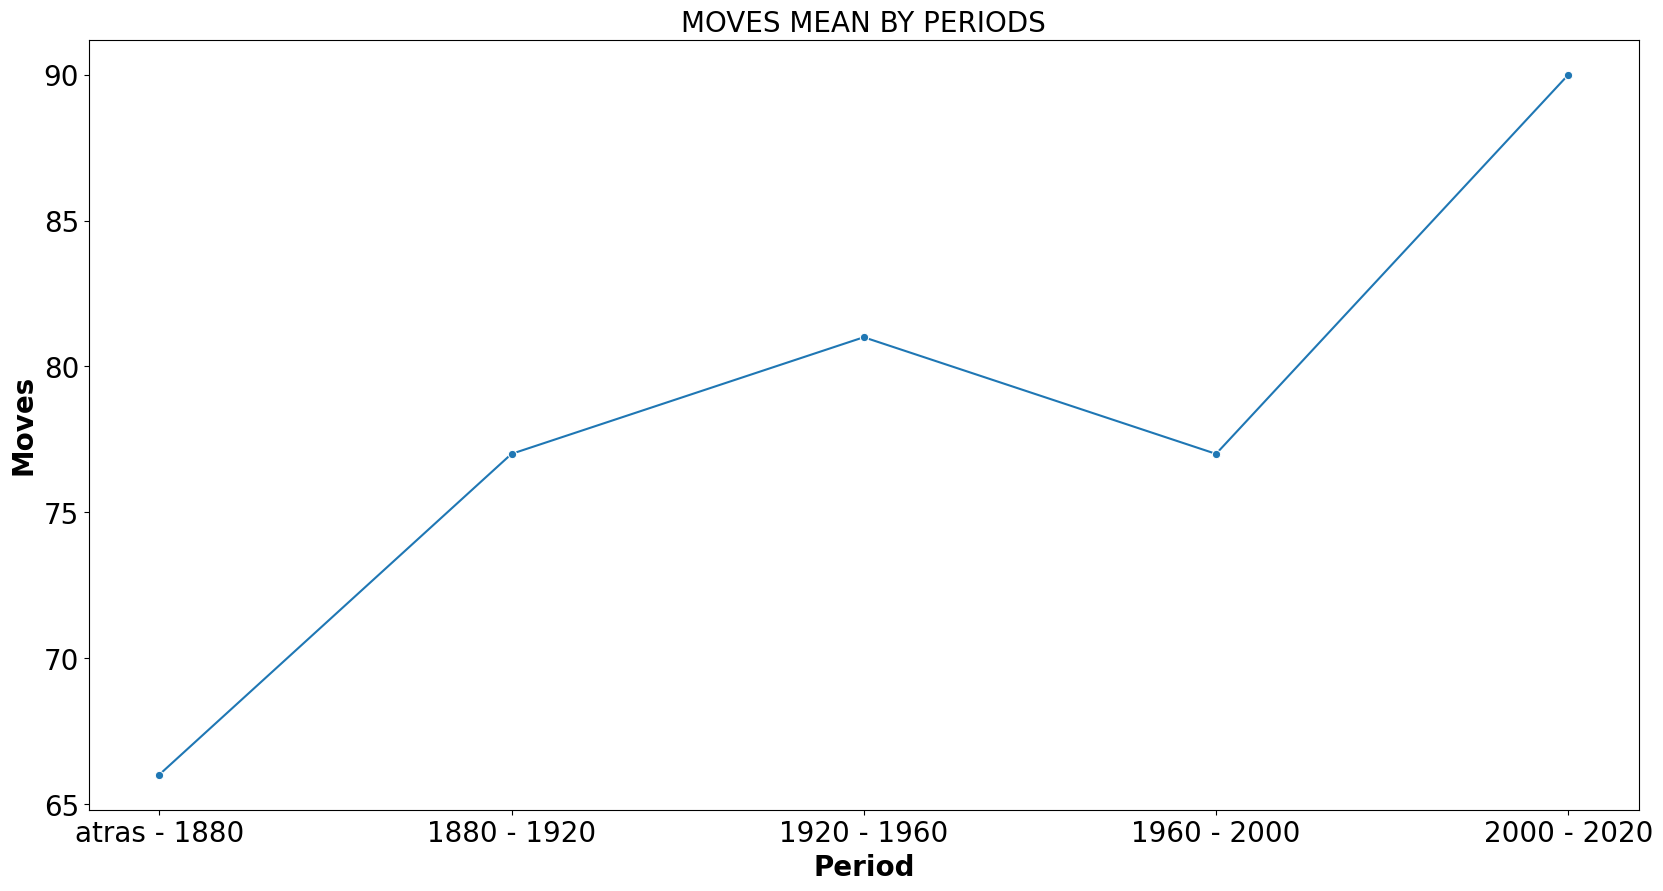

In [11]:
plt.figure(figsize=(20, 10))
sns.lineplot(x= titulos, y= medias_periodos, marker= 'o')
#plt.xticks(rotation=45)
plt.title('MOVES MEAN BY PERIODS', size= 20)
plt.ylabel('Moves', fontweight='bold', size= 20)
plt.xlabel('Period', fontweight='bold', size= 20)
plt.tick_params(axis='both', labelsize= 20);
#plt.savefig('evolucion_moves_por_periodo.png')

In [12]:
# no parece que haya mucha diferencia por periodos, parece que las partidas se va alargando con el tiempo, pero no significativamente en lo referente a descriptivas, rollo medias, 
# percentiles, medianas y tal
# si que hay partidas mas largas en los outliers, muchas mas y mucho mas largas, y si se van incrementando con el tiempo
# una partida muy larga en el primer periodo podian ser 150 moves, ahora podrian rondar los 300 moves y mas 

<Axes: xlabel='moves', ylabel='Count'>

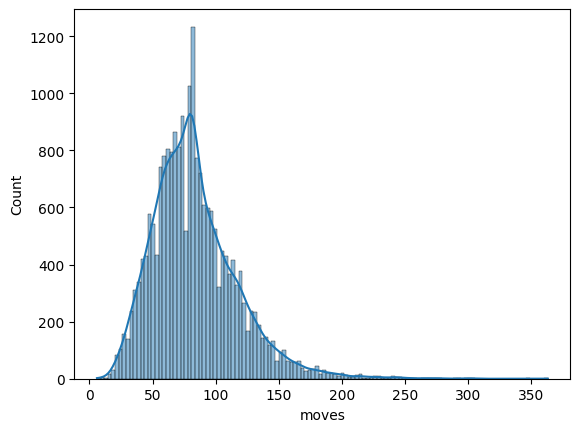

In [ ]:
sns.histplot(df_gm, x= 'moves', kde= True)

In [ ]:
# los movimientos se distribuyen normalmente, media y mediana similares
df_gm.moves.describe()

count    21392.000000
mean        83.545204
std         33.674796
min          6.000000
25%         60.750000
50%         80.000000
75%        101.000000
max        363.000000
Name: moves, dtype: float64

correlacion entre el elo del oponente y la q de movimientos de la partida

<Axes: xlabel='opponent_Elo', ylabel='moves'>

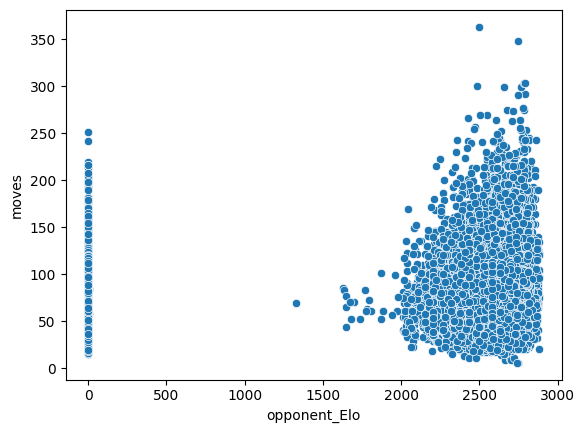

In [13]:
sns.scatterplot(df_gm, x= 'opponent_Elo', y= 'moves')
#no veo correlacion entre el elo del oponente y la q de movimientos en la partida

voy a estudiar a caruana que es un crack y no tengo data suya individual, asi que la cojo de aqui

In [14]:
df_caruana = df_gm[df_gm['player'] == 'Caruana']
df_caruana.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1961 entries, 10493 to 12453
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     1961 non-null   int64         
 1   player         1961 non-null   object        
 2   color          1961 non-null   object        
 3   opponent       1961 non-null   object        
 4   player_Elo     1955 non-null   float64       
 5   opponent_Elo   1955 non-null   float64       
 6   result         1961 non-null   object        
 7   event          1961 non-null   object        
 8   site           1961 non-null   object        
 9   date           1961 non-null   datetime64[ns]
 10  moves          1955 non-null   float64       
 11  resultado_num  1961 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 199.2+ KB


creamos un dataset para capablanca, que me sucede como con caruana


In [15]:
df_capablanca = df_gm[df_gm['player'] == 'Capablanca']
df_capablanca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 765 entries, 14985 to 15749
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     765 non-null    int64         
 1   player         765 non-null    object        
 2   color          765 non-null    object        
 3   opponent       765 non-null    object        
 4   player_Elo     765 non-null    float64       
 5   opponent_Elo   765 non-null    float64       
 6   result         765 non-null    object        
 7   event          507 non-null    object        
 8   site           764 non-null    object        
 9   date           765 non-null    datetime64[ns]
 10  moves          765 non-null    float64       
 11  resultado_num  765 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 77.7+ KB


creamos un dataset para caruana

C:\Users\franc\AppData\Local\Temp\ipykernel_11840\1526075110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(res_caruana, palette= 'bright')


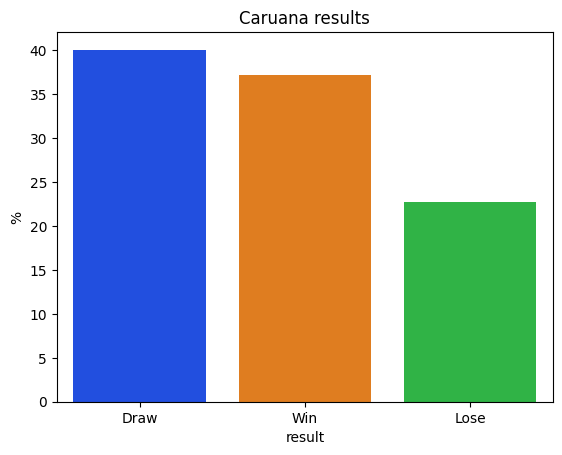

In [31]:
res_caruana = df_caruana.result.value_counts(normalize= True) * 100
sns.barplot(res_caruana, palette= 'bright')
plt.ylabel('%')
plt.title('Caruana results')
#plt.savefig('./caruana/barras_resultados.png', transparent= True);

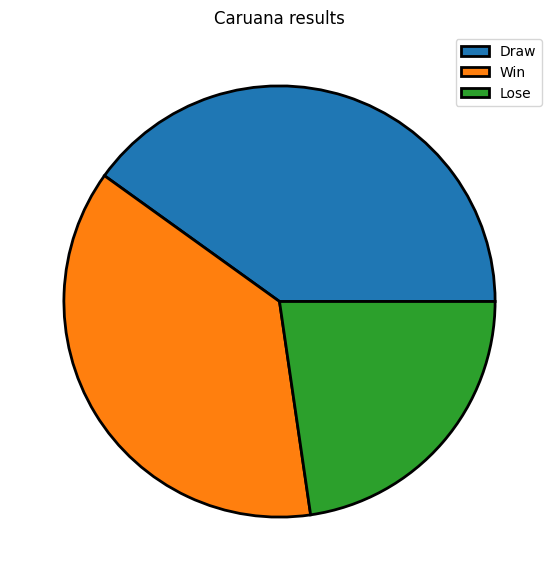

In [19]:
plt.figure(figsize= (7, 7))
plt.pie(res_caruana, wedgeprops={'edgecolor': 'black', 'linewidth': 2})
plt.title('Caruana results')
plt.legend(['Draw', 'Win', 'Lose'], loc= 'best');
#plt.savefig('./caruana/resultados_torta.png')
#colocar luego los porcetajes en la torta con el powerpint, va a ser mas simple

In [20]:
# elo medio de los oponentes de Caruana
df_caruana.opponent_Elo.mean()

2656.285421994885

<Axes: xlabel='opponent_Elo'>

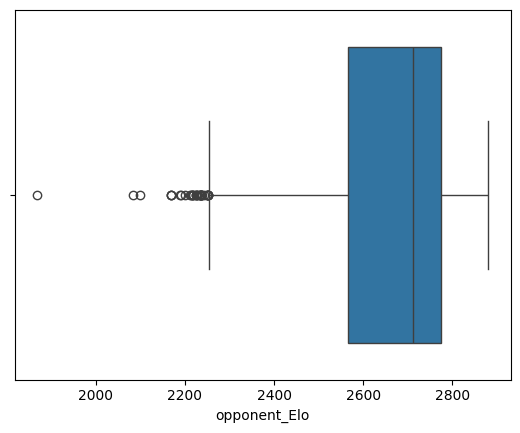

In [21]:
# boxplot del elo de los oponentes de caruana
sns.boxplot(df_caruana, x= 'opponent_Elo')

<Axes: xlabel='moves'>

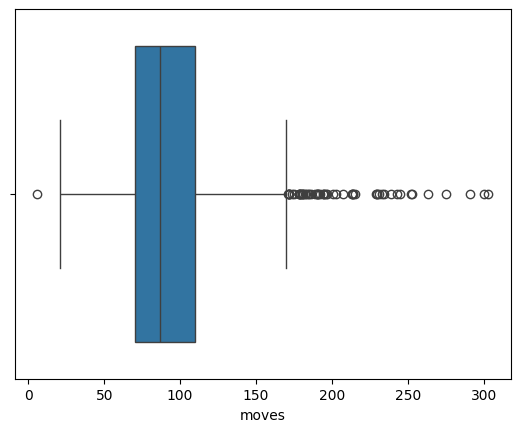

In [22]:
# boxplot del elo de la cantidad de movimientos de caruana
sns.boxplot(df_caruana, x= 'moves')

<Axes: xlabel='opponent_Elo', ylabel='moves'>

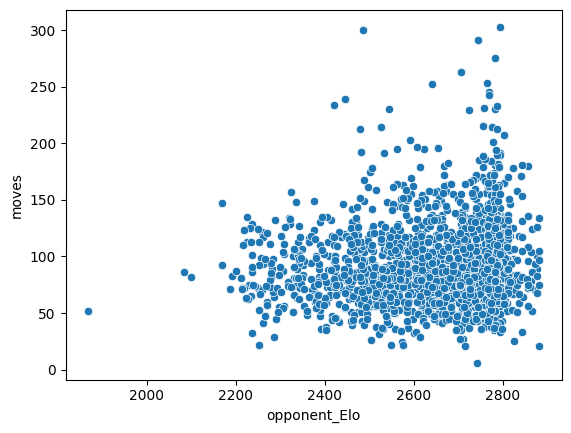

In [23]:
# vamos a ver la correlacion entre el elo del oponente de caruana y la q de movimientos
sns.scatterplot(df_caruana, x= 'opponent_Elo', y= 'moves')
# no veo correlacion

<Axes: xlabel='moves', ylabel='resultado_num'>

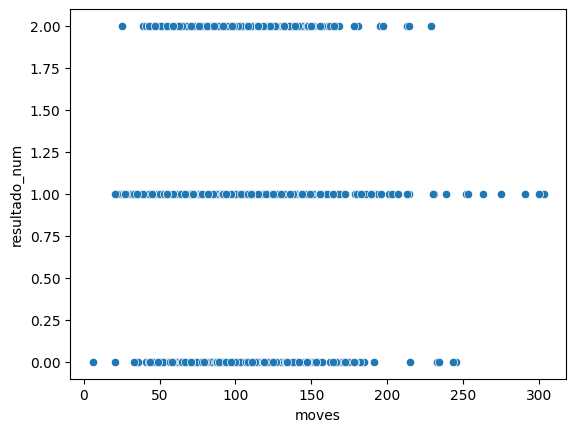

In [24]:
# vamos a estudiar la correlacion entre el elo del oponente de caruana y el resultado de la partida
sns.scatterplot(df_caruana, x= 'moves', y= 'resultado_num')
# valiente tonteria de grafica

<Axes: xlabel='moves', ylabel='Count'>

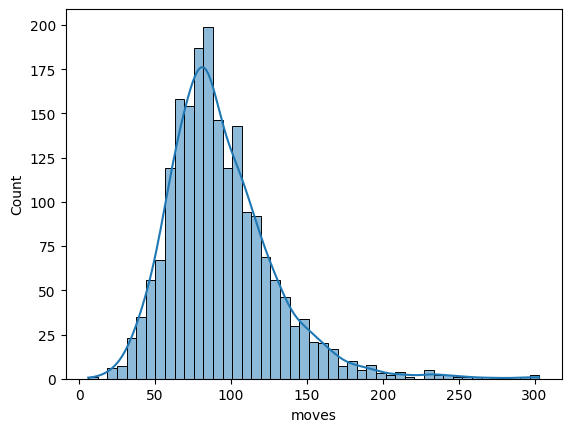

In [25]:
sns.histplot(df_caruana, x= 'moves', kde= True)

vemos los datos de copablanca

C:\Users\franc\AppData\Local\Temp\ipykernel_11840\617519672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(res_capablanca, palette= 'bright')


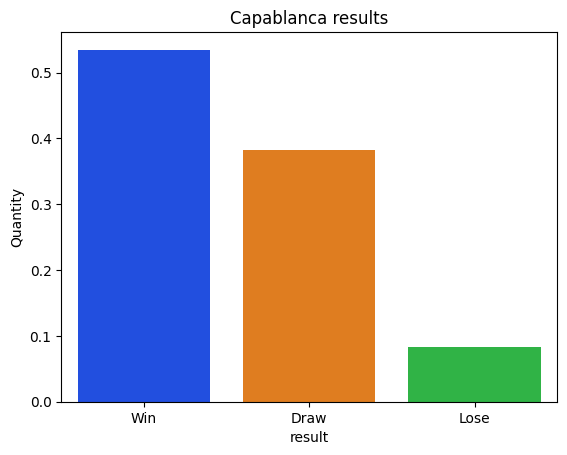

In [32]:
res_capablanca = df_capablanca.result.value_counts(normalize= True)
sns.barplot(res_capablanca, palette= 'bright')
plt.ylabel('Quantity')
plt.title('Capablanca results')
#plt.savefig('./capablanca/barras_resultados.png', transparent= True);

In [27]:
res_capablanca

result
Win     0.534641
Draw    0.381699
Lose    0.083660
Name: proportion, dtype: float64

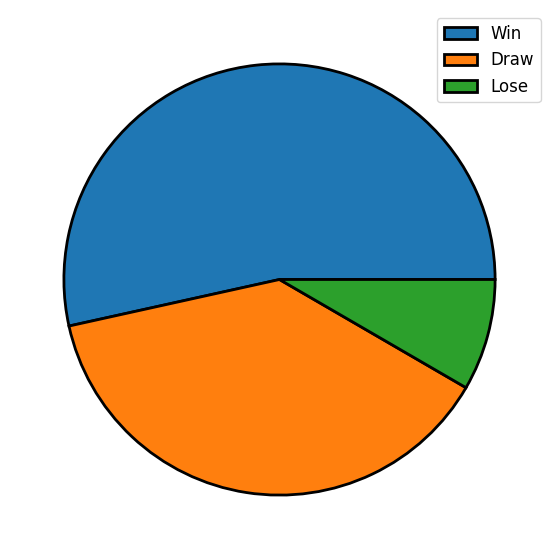

In [28]:
plt.figure(figsize= (7, 7))
plt.pie(res_capablanca, wedgeprops={'edgecolor': 'black', 'linewidth': 2})
plt.legend(['Win', 'Draw', 'Lose'], loc= 'best', fontsize= 'large');
plt.savefig('./capablanca/resultados_torta.png', transparent= True) # le quitamos el fondo para que salga mejor en la presentacion
#colocar luego los porcetajes en la torta con el powerpint, va a ser mas simple

<Axes: xlabel='opponent_Elo', ylabel='moves'>

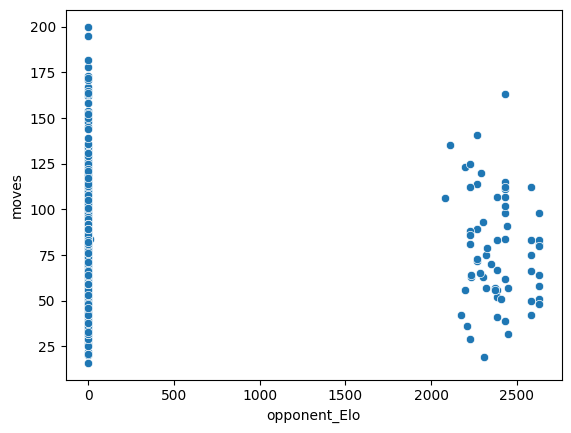

In [29]:
# vamos a ver la correlacion entre el elo del oponente de capablanca y la q de movimientos
sns.scatterplot(df_capablanca, x= 'opponent_Elo', y= 'moves')
# no veo correlacion

<Axes: xlabel='moves', ylabel='Count'>

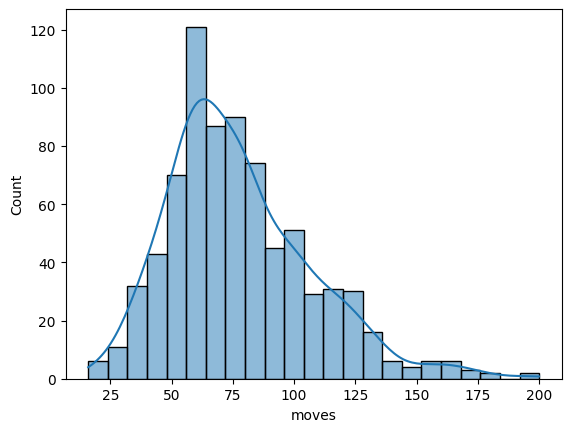

In [30]:
sns.histplot(df_capablanca, x= 'moves', kde= True)